<h1><center>cs1001.py , Tel Aviv University, Spring 2020</center></h1>
<img src="http://www.pngall.com/wp-content/uploads/2016/05/Python-Logo-PNG-Image-180x180.png" width=50/>

# Recitation 2

We tested if a positive integer (or a range of integers) satisfies the Collatz conjecture (using "while" and "for" loops). 
We discussed the basics of lists, the efficiency of list operations and how to efficiently concatenate a list to another. We also demonstrated list comprehension. 
Finally, we discussed functions, short circuit evaluation and analyzed the efficiency of the functions we saw.

#### Takeaways:

<ol>
  <li>Lists can be a highly modular and useful data structure. Make sure that you understand their functionality and also their limits (figuratively and literally).</li>
  <li>Avoid using the + operator for extending a given list. Use += or list.extend() instead.
  <li>Functions can be used in one another (max2 in max3_v3) and can be composed together.</li>
  <li>When analyzing a function's performance, think about the input that will cause the largest amount of work and then measure how many operations the function does.</li>
  <li>Using short circuit evaluation, if e.g. you have a long "and" condition, place the part that is most easy to compute first since if it is false, all other parts of the condition will not be computed.</li>
</ol>


Code for printing several outputs in one cell (not part of the recitation):

In [11]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Collatz Conjecture

The Collatz Conjecture, from Wikipedia:

Start with any positive integer $n$. Each term in the Collatz sequence is obtained from the previous term as follows: 
* If the previous term is even, the next term is one half the previous term: $n \to n // 2$ 
* If the previous term is odd, the next term is 3 times the previous term plus 1: $n \to 3\cdot n + 1$ 
* If we reach $1$, we stop

The Collatz conjecture is the following statement: for any $n \geq 1$, the sequence above reaches $1$ in a finite amount of steps.

32 -> 16 -> 8 -> 4 -> 2 -> 1


7 -> 22 -> 11 -> 34 -> 17 - > 52 -> 26-> 13 -> 40 -> 20 -> 10 -> 5 -> 16 -> 8-> 4 -> 2 -> 1 

### Check conjecture for a single number:

In [2]:
orig_num = int(input("Enter a positive integer to apply Collatz algorithm: "))
num = orig_num

while num != 1:
    print(num, end = " ")
    if num % 2 == 0:
        num = num // 2
    else:
        num = 3*num + 1

print(num)
print(orig_num, "is OK!")

Enter a positive integer to apply Collatz algorithm: 7
7 22 11 34 17 52 26 13 40 20 10 5 16 8 4 2 1
7 is OK!


### Check conjecture for a range of numbers:

In [3]:
limit = int(input("Check Collatz algorithm for 1 ... "))

orig_num = 1
while orig_num <= limit:
    num = orig_num

    while num > 1:
        print(num, end=" ")
        if num % 2 == 0:
            num = num // 2
        else:
            num = 3*num + 1

    print(num)
    print(orig_num, "is OK!")
    
    orig_num += 1
    


Check Collatz algorithm for 1 ... 10
1
1 is OK!
2 1
2 is OK!
3 10 5 16 8 4 2 1
3 is OK!
4 2 1
4 is OK!
5 16 8 4 2 1
5 is OK!
6 3 10 5 16 8 4 2 1
6 is OK!
7 22 11 34 17 52 26 13 40 20 10 5 16 8 4 2 1
7 is OK!
8 4 2 1
8 is OK!
9 28 14 7 22 11 34 17 52 26 13 40 20 10 5 16 8 4 2 1
9 is OK!
10 5 16 8 4 2 1
10 is OK!


### The type $range$

We've met the python type $range$ in the lecture. Given integers $a,b,c$, $range(a,b,c)$ represents the range of indices from $a$, up to (and excluding) $b$, in intervals of size $c$.

We can also declare simpler range variables by the following logic:
* $range(a) = range(0,a,1)$
* $range(a,b) = range(a,b,1)$


In [6]:
for i in range(10):
    print(i)
    

0
1
2
3
4
5
6
7
8
9


In [7]:
for i in range(1, 7, 2):
    print(i)


1
3
5


In [8]:
for i in range(7, 1, -2):
    print(i)

7
5
3


### Check conjecture for a range of numbers (using "for")

In [ ]:
limit = int(input("Check Collatz algorithm for 1 ... "))


for orig_num in range(1, limit + 1):
    num = orig_num

    while num > 1:
        print(num, end=" ")
        if num % 2 == 0:
            num = num // 2
        else:
            num = 3*num + 1

    print(num)
    print(orig_num, "is OK!")
    
    

## Lists - Basics

A Python list is a collection of **ordered** elements. The elements can be of different types, they can include repetitions and they can even include lists.

Python allows us to check how many elements a list contains using the $len(lst)$ function, and access an element at index $i$ using the command $lst[i]$

<img src="http://nandabezerra.com/en/wp-content/uploads/2014/01/i-love-lists-300x2261.jpeg" width=300>

In [10]:
x = 10
lst = [x, 1, 2, 3, "name", print, True, [3.14, 2.5]]
print(type(lst))
len(lst)
print(lst)



<class 'list'>


8

[10, 1, 2, 3, 'name', <built-in function print>, True, [3.14, 2.5]]


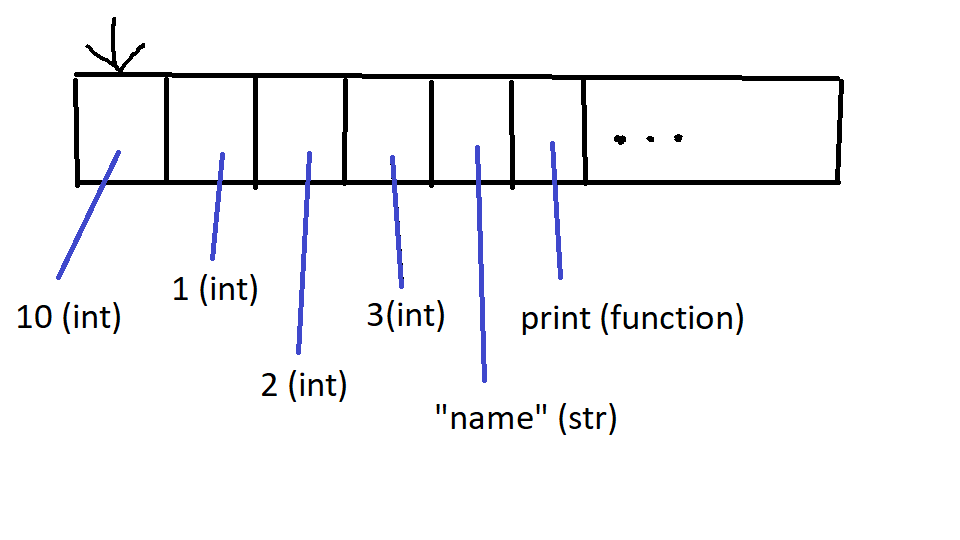

In [12]:
lst[0]

lst[4]
print(type(lst[5]))

lst[5]("hi", "my name is", "michal")




10

'name'

<class 'builtin_function_or_method'>
hi my name is michal


In [15]:
lst[7]
lst[8]






[3.14, 2.5]

IndexError: list index out of range

In [16]:

lst

lst[-1]



lst[-1][0]



[10, 1, 2, 3, 'name', <function print>, True, [3.14, 2.5]]

[3.14, 2.5]

3.14

In [17]:
print(lst)
lst[1] = 1000

print(lst)

lst[8] = 40


[10, 1, 2, 3, 'name', <built-in function print>, True, [3.14, 2.5]]
[10, 1000, 2, 3, 'name', <built-in function print>, True, [3.14, 2.5]]


IndexError: list assignment index out of range

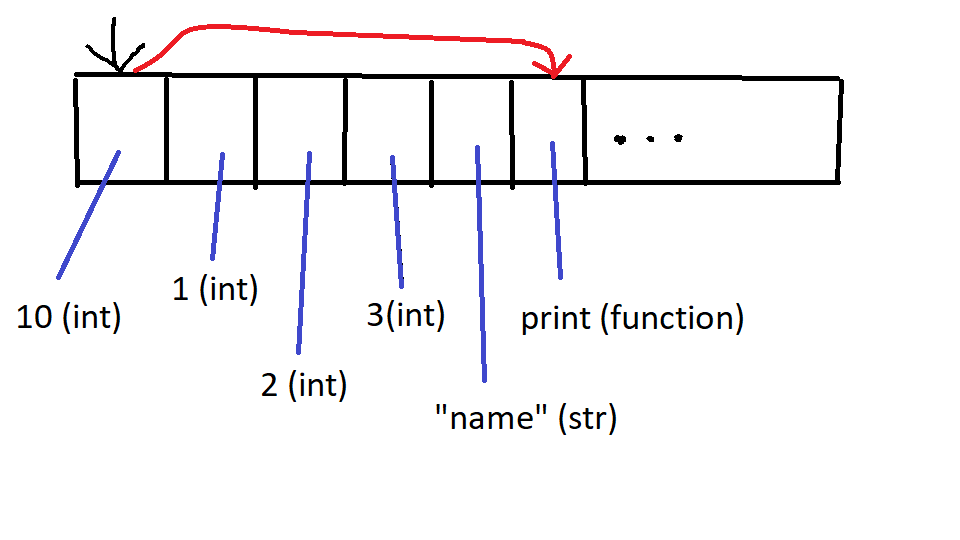

## The empty list

Just like we've seen the important empty string (''), there is an important list in python - the empty list (that is - the list containing no items).

What would we expect the length of the empty list to be? What can we expect will happen if we try to access to first element in that list?

In [18]:
empty_lst = []
len(empty_lst)
empty_lst[0]

0

IndexError: list index out of range

## List slicing

List slicing is a method of extracting a sublist from an existing one. The syntax should be familiar, it is the same as the syntax for range. Specifically, $lst[a:b:c]$ will give us the sublist of $lst$, starting from index $a$, up to (and exclusive of) $b$, in intervals of size $c$.

In [20]:
x = 10
lst = [x, 1, 2, 3, "name", print, True, [3.14, 2.5]]
lst_new = lst[3: 8: 2]
print(lst_new)
print(lst)



[3, <built-in function print>, [3.14, 2.5]]
[10, 1, 2, 3, 'name', <built-in function print>, True, [3.14, 2.5]]


## List concatenation

Again, similar to what we've seen last week with strings, a natural action to take given two lists $l1, l2$ is concatenation: a list containing $len(l1)+len(l2)$ items, where the first $len(l1)$ items are those of $l1$ and the rest are those of $l2$.

There are various methods of concatenating lists in python, let's look at them and discuss their pros and cons.

In [21]:
lst1 = [1, 2, 3]
lst2 = [10, 20, 30]

# Creating a new concatenated list
lst_new = lst1 + lst2
lst_new
lst1
lst2




[1, 2, 3, 10, 20, 30]

[1, 2, 3]

[10, 20, 30]

In [22]:
# Adding the elements of lst2 to lst1
print("Bad coding:")
lst1 = lst1 + lst2
lst1



Bad coding:


[1, 2, 3, 10, 20, 30]

In [ ]:
print("Good coding:")
lst1 = [1, 2, 3]
lst2 = [10, 20, 30]
lst1.extend(lst2)
lst1

lst1.append(10)
lst1

lst1.append(lst2)
lst1



In [ ]:

lst1 = [1,2,3]
lst2 = [10,20,30]

lst1 += lst2 #invokes extend!! 
lst1.extend(lst2)



### Common List functions

We've seen the $len(\cdot)$ function, and in a sense, the indexing call $lst[i]$ is also a function. What other builtin functions does Python supply for lists?

In [23]:
lst = [10, -40.5, 6]
sum(lst)

-24.5

In [24]:
lst = [10, -40.5, 6]
slst = sorted(lst)
slst
lst

lst.sort()
lst

[-40.5, 6, 10]

[10, -40.5, 6]

[-40.5, 6, 10]

### Iterating over lists

Let's combine two things we've seen today: loops and lists.

Given a list, it is easy to iterate over the list elements. One way of doing that is to initialize an index $i=0$ and use a $while$ loop to iterate over $i < len(lst)$ where in each iteration we can access the $i$-th element in the list via the command $lst[i]$

In [25]:
lst = [1, 2, 3, 4, "hi", "bye", 100]
i = 0
while i < len(lst):
    print(lst[i])
    i += 1

1
2
3
4
hi
bye
100


But wait, this is a very structured loop! Given $lst$, we know exactly how many iterations it will run and so it makes much more sense to do a similar iteration with a for loop iterating over the $range$ of the length of the list:

In [26]:
lst = [1, 2, 3, 4, "hi", "bye", 100]
for i in range(len(lst)):
    print(lst[i])
    

1
2
3
4
hi
bye
100


Finally, we have another option. A list is what we call an "iterable" type in python, meaning there is a natural way for python to iterate over the elements of the list.
We can use this natural iteration by iteration over the **elements** of the list using a for loop:

In [30]:
lst = [1, 2, 3, 4, "hi", "bye", 100]
for item in lst:
    print(item)
    print(type(item))
    
print(lst)

1
<class 'int'>
2
<class 'int'>
3
<class 'int'>
4
<class 'int'>
hi
<class 'str'>
bye
<class 'str'>
100
<class 'int'>
[1, 2, 3, 4, 'hi', 'bye', 100]


Think? When would it make sense to loop over the list using the $range$ of the length of the list and when would it make sense to simply loop over the elements themselves?

## Exercise: given grades, how many are there above average?

#### solution 1: using loops

In [4]:
count = int(input("How many grades? "))
above = 0

grades = []
for i in range(count):
    grade = float(input("enter a grade: "))
    #grades[i] = grade #wrong
    #grades.append(grade)
    #grades.extend([grade])
    grades += [grade] #invokes extend
    #grades = grades + [grade] #bad coding!
    
s = sum(grades)
avg = s/count

for grade in grades:
    if grade > avg:
        above += 1

print(above, "grades are above the average", avg)


How many grades? 4
enter a grade: 86
enter a grade: 75
enter a grade: 46
enter a grade: 99
2 grades are above the average 76.5


#### list comprehension:

A list comprehension command has the following structure:

    lst = [x for y in object if cond]

And is equivalent to the following piece of code:

    lst = []
    for y in object:
        if cond:
            lst.append(x)


#### list comprehension example:

In [12]:
lst = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

lst1 = [x for x in lst if x % 3 == 0]
lst1


[0, 3, 6, 9]

In [13]:
lst2 = [x**2 for x in lst if x % 3 == 0]
lst2


[0, 9, 36, 81]

In [14]:
lst3 = ["hi" for x in lst if 2*x > 10]
lst3




['hi', 'hi', 'hi', 'hi']

In [15]:
lst4 = [1 for x in lst]
lst4

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

#### Solution 2: using list comprehension

In [ ]:
count = int(input("How many grades? "))
above = 0

grades = []
#try to replace this loop by list comprehension exp
for i in range(count):
    grade = float(input("enter a grade: "))
    #grades[i] = grade #wrong
    #grades.append(grade)
    #grades.extend([grade])
    grades += [grade] #invokes extend
    #grades = grades + [grade] #bad coding!
    
s = sum(grades)
avg = s/count


above = len([grade for grade in grades if grade > avg])

print(above, "grades are above the average", avg)


## Functions: max2, max3

In the code we've seen so far we made use of various built-in python functions (print, len, etc). 

Each call to such a function is actually a call to a sequence of commands encapsulated within it 

For example, printing a string encapsulates an iteration over the characters of the string, printing each one in turn. Had we needed to call this sequence of command each time we wanted to print a string, our code would look a lot more messy.

Similarly, we would like to have the option of defining a complex operation that is easily callable, and for that we use functions:

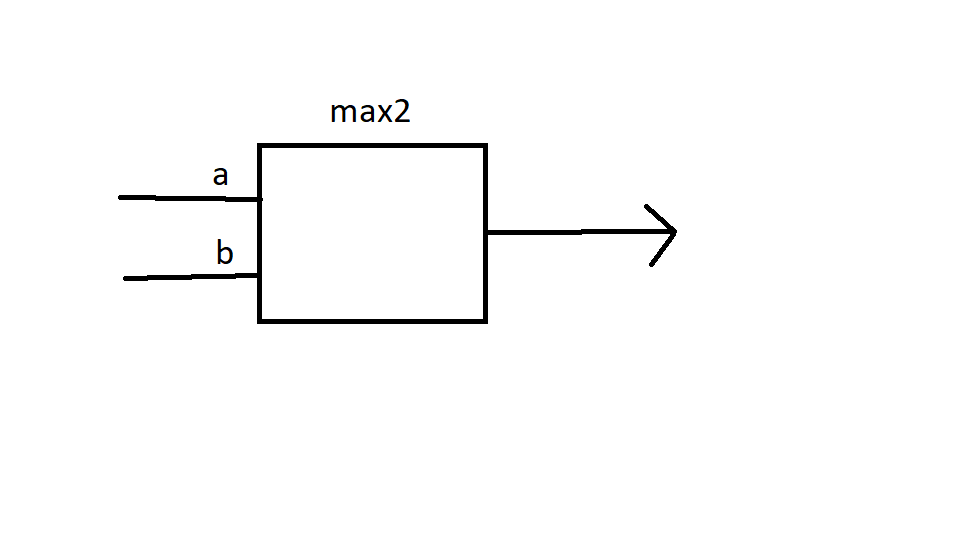

In [36]:
def max2(a,b):
    '''
    max2(float,float)  ---> float
    return the maximum of a and b
    '''
    if a>=b:
        return a
    #else:
    #    return b
    return b

x = max2(10,30)
print(x)
y = max2(10)

30


TypeError: max2() missing 1 required positional argument: 'b'

### max3

So we know how to find the maximum between two numbers. What do we do if we're given 3 numbers?

Given $a,b,c$, we can check whether $a$ is the largest (i.e., $a \geq b$ and $a \geq c$). If this is not the case we can check if $b$ is the largest similarly ($b \geq a$ and $b \geq c$). If this is also False, we must have that $c$ is the largest.

Let's see the code:

In [ ]:
def max3_v1(a,b,c):
    if a >= b and a >= c:
        return a
    elif b >= a and b >= c:
        return b
    else:
        return c

But...

Come to think of it, we already know how to find the maximum between two numbers. How can we use the function $max2$ in order to solve $max3$ without "reinventing the wheel"?

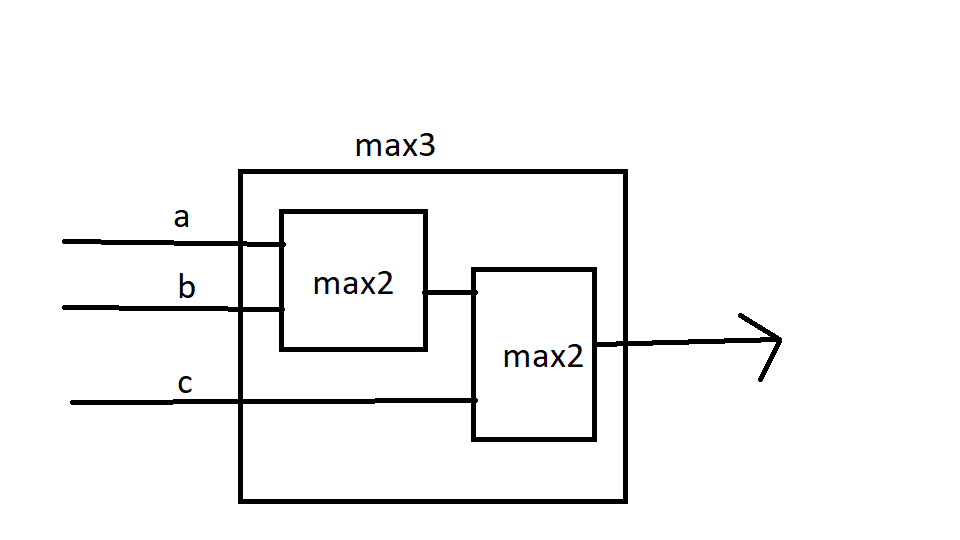

In [ ]:
def max3_v2(a,b,c):
#    max_ab = max2(a,b)
#    total_max = max2(max_ab,c)
#    return total_max
    return max2(max2(a,b), c)




#### Collatz over range, with functions

In [37]:

def collatz(orig_num):
    num = orig_num
    
    while num > 1:
        print(num, end=" ")
        if num%2 == 0:
            num = num//2
        else:
            num = 3*num+1
            
    print(num)
    print(orig_num, "is OK!")
    
            
def collatz_range(limit):
    for num in range(1, limit + 1):
        collatz(num)

        
collatz_range(6)
    

1
1 is OK!
2 1
2 is OK!
3 10 5 16 8 4 2 1
3 is OK!
4 2 1
4 is OK!
5 16 8 4 2 1
5 is OK!
6 3 10 5 16 8 4 2 1
6 is OK!


## Short circuit evaluation

When python evaluates logical expressions, there are certain cases where the evaluation can be "cut short" in the middle of the expression. Consider the following example: given the predicate $a \textrm{ or } b$ and prior knowledge that $a = True$, do we really need to evaluate $b$?

The answer is no, since $True \textrm{ or } b = True$ for any $b$.

And since python is smart and efficient, given such a predicate, after evaluating $a = True$ python will immediately interpret the whole predicate as $True$ without evaluating $b$:

In [38]:
x = True or 3/0
x

x = 3/0 or True
x


True

ZeroDivisionError: division by zero

What do we expect will happen on the other hand, given a predicate of the form $a \textrm{ and } b$?

In [39]:
x = False and 3/0
x

x = True and 3/0
x

False

ZeroDivisionError: division by zero